# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.iloc[:,2:6]

,Make,Model,Trim,Type
0,Buick,Century,Sedan 4D,Sedan
1,Buick,Century,Sedan 4D,Sedan
2,Buick,Century,Sedan 4D,Sedan
3,Buick,Century,Sedan 4D,Sedan
4,Buick,Century,Sedan 4D,Sedan
...,...,...,...,...
799,Saturn,L Series,L300 Sedan 4D,Sedan
800,Saturn,L Series,L300 Sedan 4D,Sedan
801,Saturn,L Series,L300 Sedan 4D,Sedan
802,Saturn,L Series,L300 Sedan 4D,Sedan


In [4]:
x = df[['Mileage']]
y = df[['Price']]

In [5]:
regression_model = linear_model.LinearRegression()
regression_model.fit(x, y)

LinearRegression()

In [6]:
w_t1_0 = regression_model.intercept_[0]
w_t1 = w1 = regression_model.coef_[0]
equation_1 = "y = %f + (%f * x1)" % (w_t1_0, w1)
print(equation_1)

y = 24764.559006 + (-0.172521 * x1)


In [7]:
y_pred=regression_model.predict(x)
y_pred

array([[23346.26795261],
       [23188.58421306],
       [22487.97845123],
       [21945.22894945],
       [21343.13239471],
       [20928.393106  ],
       [20869.73613505],
       [20802.79817996],
       [20620.44400851],
       [20050.43626729],
       [22998.46661899],
       [22165.36511101],
       [21895.02548313],
       [21348.65305079],
       [20734.65258136],
       [20664.60925723],
       [20622.68677505],
       [20273.16023639],
       [19089.32454624],
       [18784.1357768 ],
       [23217.05009602],
       [22939.80964804],
       [22286.64702447],
       [21916.59054598],
       [21502.54133928],
       [21406.10237822],
       [21073.65536935],
       [20866.28572499],
       [20543.15482326],
       [20409.2789131 ],
       [22046.49848459],
       [21963.68864325],
       [21633.82944191],
       [20951.51085337],
       [20691.00489415],
       [20548.33043835],
       [20414.97208969],
       [20144.63246181],
       [20089.94346243],
       [19649.4986188 ],


In [8]:
print(regression_model.coef_)
print('.....................')
print(regression_model.intercept_)

[[-0.1725205]]
.....................
[24764.55900606]


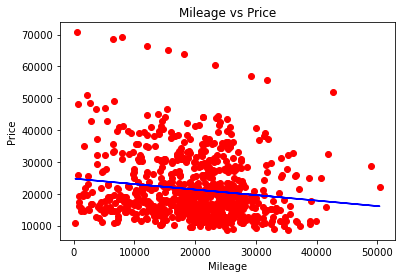

In [9]:
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'blue')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [10]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print('r2 score is',r2)

r2 score is 0.02046344732348926


# Part 2

In [11]:
x2 = df[['Mileage', 'Cylinder', 'Liter','Doors', 'Cruise', 'Sound', 'Leather']]
y2 = df[['Price']]

In [12]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

In [13]:
regression_model.fit(x_train, y_train)

LinearRegression()

In [17]:
w_t2_0 = regression_model.intercept_[0]
w_t2 = w1, w2, w3, w4, w5, w6, w7 = regression_model.coef_[0]
equation_2 = "y = %f + (%f * x1) + (%f * x2) + (%f * x3) + (%f * x4) +(%f * x5) + (%f * x6) + (%f * x7)" % (w_t2_0, w1, w2, w3, w4, w5, w6, w7)
print(equation_2)

y = 5625.955677 + (-0.170826 * x1) + (4956.754192 * x2) + (-2113.471612 * x3) + (-1805.921702 * x4) +(6394.306279 * x5) + (-2000.634189 * x6) + (3279.046917 * x7)


In [18]:
y_pred2=regression_model.predict(x_test)
y_pred2

array([[10348.42452391],
       [19290.31449972],
       [10080.65985545],
       [23225.38062645],
       [28668.38487589],
       [ 8034.97679786],
       [16155.73712104],
       [11180.68886438],
       [13618.835185  ],
       [19235.49488168],
       [20535.78951921],
       [15053.1199156 ],
       [21008.49617129],
       [22934.12822678],
       [18321.33406983],
       [24759.26881747],
       [18581.22829323],
       [33665.11767046],
       [21140.88634484],
       [21317.80760937],
       [22172.41487775],
       [25719.63722257],
       [19488.45512693],
       [10485.4468242 ],
       [22719.4999298 ],
       [21813.90987853],
       [23586.40076979],
       [19129.20798504],
       [12199.53665335],
       [22086.80959624],
       [17077.17272892],
       [20532.40321226],
       [16951.65103777],
       [20036.93989297],
       [25763.78114122],
       [27387.65330649],
       [14150.56804613],
       [25046.25654851],
       [23071.45083537],
       [11907.89527572],


In [19]:
r2_2 = r2_score(y_test,y_pred2)
print('r2 score is',r2_2)

r2 score is 0.33997793405964327


In [20]:
corr = df.corr()["Price"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr = abs(corr)

# random threshold for features to keep
relevant_features = abs_corr[abs_corr>0.14]
relevant_features

Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Name: Price, dtype: float64

In [21]:
X_train = x_train[relevant_features.index]
X_test = x_test[relevant_features.index]

In [22]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred2_F=regression_model.predict(X_test)
y_pred2_F

array([[11197.50271347],
       [19020.95905046],
       [ 9013.94913044],
       [24871.15545478],
       [26382.64372042],
       [ 7723.10481395],
       [17929.42891384],
       [12538.83405204],
       [14834.16484747],
       [20554.83214696],
       [22621.32541119],
       [16667.01863061],
       [19010.876443  ],
       [24025.52703022],
       [19900.97174724],
       [26209.54395786],
       [19774.00649162],
       [32741.81042819],
       [19138.31480635],
       [22896.8042573 ],
       [23832.50047413],
       [25547.34926663],
       [21613.16462968],
       [ 9629.70370282],
       [24585.23073253],
       [23851.6400364 ],
       [25557.83417583],
       [21267.35446438],
       [12841.24997877],
       [22188.52828561],
       [18816.39992272],
       [21652.20131242],
       [18042.32287178],
       [21552.40849958],
       [24823.53783965],
       [26926.86837273],
       [11920.88131727],
       [26485.79744227],
       [23136.34083569],
       [13238.84064915],


In [24]:
r2_2_f = r2_score(y_test,y_pred2_F)
print('r2 score after feature selection is',r2_2_f)

r2 score after feature selection is 0.3435261905421205


# Hard Mode

In [25]:
categorical_columns = ['Make','Model','Trim','Type']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(left=df,right=tempdf,left_index=True,right_index=True)
    df = df.drop(columns=column)

In [26]:
df

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
x3 = df.iloc[:,1:]
y3 = df[['Price']]

In [28]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x3, y3, test_size = 0.2, random_state = 42)

In [29]:
regression_model.fit(x_train1, y_train1)

LinearRegression()

In [30]:
y_pred3=regression_model.predict(x_test1)
y_pred3

array([[11916.9816487 ],
       [29400.69642463],
       [ 9448.99200071],
       [20884.86972913],
       [14968.37496544],
       [10366.4256013 ],
       [28421.24556051],
       [13935.24821805],
       [ 7961.55108558],
       [27029.75797522],
       [22284.11308201],
       [25878.70966866],
       [12527.35783551],
       [16296.89512907],
       [14824.73479907],
       [16979.47386904],
       [16106.32023096],
       [36433.27903873],
       [13032.5049533 ],
       [15436.24961836],
       [34759.52750045],
       [22188.18660066],
       [16771.03026595],
       [15661.08575345],
       [21141.98571626],
       [23494.19229183],
       [26404.55785516],
       [15236.86985335],
       [ 8564.94984387],
       [23362.68869914],
       [27340.4191632 ],
       [18253.95415124],
       [12221.68920009],
       [15669.88671598],
       [16958.71403926],
       [22015.20248988],
       [11524.47210714],
       [17234.77305194],
       [22622.33910332],
       [13692.48121859],


In [31]:
r2_3 = r2_score(y_test1,y_pred3)
print('r2 score is',r2_3)

r2 score is 0.9914044828588733


In [32]:
corr_n = df.corr()["Price"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr = abs(corr_n)

# random threshold for features to keep
relevant_features_n = abs_corr[abs_corr<0.5]
relevant_features_n

Trim_Hardtop Conv 2D    0.472538
Model_XLR-V8            0.472538
Cruise                  0.430851
Make_SAAB               0.335404
Model_Deville           0.296848
                          ...   
Type_Hatchback          0.206178
Make_Saturn             0.211701
Model_Cavalier          0.243693
Model_AVEO              0.304437
Make_Chevrolet          0.404598
Name: Price, Length: 93, dtype: float64

In [33]:
X_train1 = x_train1[relevant_features_n.index]
X_test1 = x_test1[relevant_features_n.index]

In [34]:
regression_model.fit(X_train1, y_train1)

LinearRegression()

In [35]:
y_pred3_f=regression_model.predict(X_test1)
y_pred3_f

array([[11917.12475586],
       [29400.18200684],
       [ 9448.97998047],
       [20884.90686035],
       [14969.22045898],
       [10365.6842041 ],
       [28421.67907715],
       [13935.32751465],
       [ 7961.80773926],
       [27029.60302734],
       [22283.82580566],
       [25878.88562012],
       [12527.57275391],
       [16297.62915039],
       [14824.85302734],
       [16979.22180176],
       [16105.74743652],
       [36434.02868652],
       [13032.87658691],
       [15437.0657959 ],
       [34760.31262207],
       [22186.70666504],
       [16772.00500488],
       [15660.09643555],
       [21141.7199707 ],
       [23493.7701416 ],
       [26404.19628906],
       [15238.64050293],
       [ 8566.81713867],
       [23362.2878418 ],
       [27340.8145752 ],
       [18252.94958496],
       [12222.16491699],
       [15669.55664062],
       [16958.41955566],
       [22014.56213379],
       [11524.32226562],
       [17234.8145752 ],
       [22621.08837891],
       [13692.33093262],


In [36]:
r2_3_F = r2_score(y_test1,y_pred3_f)
print('r2 score is',r2_3_F)

r2 score is 0.9914061839309042
